In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

charaters = []
for dirpath, dirnames, filenames in os.walk("datasets/"):
    for filename in filenames:
        if ".jpg" in filename or ".jpeg" in filename:
            charaters.append(dirpath + filename)

In [3]:
charaters

['datasets/Taylor Swift9_4676.jpg',
 'datasets/scarlett johansson.jpg',
 'datasets/vijay.jpeg',
 'datasets/Zoe Saldana.jpg',
 'datasets/Selena Gomez.jpg',
 'datasets/Tom Cruise.jpg',
 'datasets/Robert Downey_Jr.jpg',
 'datasets/steve_harvey.jpeg',
 'datasets/amir_khan.jpeg',
 'datasets/Lionel Messi1_3097.jpg',
 'datasets/Zendaya.jpg',
 'datasets/Chris Evans0_1109.jpg',
 'datasets/Taylor Swift.jpg',
 'datasets/Cristiano Ronaldo9_1371.jpg',
 'datasets/srk.jpeg']

In [4]:
from deepface import DeepFace

In [5]:
from tqdm import tqdm

In [6]:
target_img_name = "test_dataset/test_amir_khan.jpeg"

In [7]:
similarities = {}

In [8]:
for charater in tqdm(charaters):
    obj = DeepFace.verify(img1_path=charater, img2_path=target_img_name , model_name="Facenet" , detector_backend= "mtcnn",distance_metric="euclidean")
    similarities[charater] = obj["distance"]
    

  0%|          | 0/15 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step


  7%|▋         | 1/15 [00:02<00:41,  2.97s/it]

1/1 [==============================] - 0s 12ms/step


 13%|█▎        | 2/15 [00:03<00:20,  1.60s/it]

1/1 [==============================] - 0s 13ms/step


 20%|██        | 3/15 [00:04<00:13,  1.15s/it]

1/1 [==============================] - 0s 12ms/step


 27%|██▋       | 4/15 [00:04<00:10,  1.02it/s]

1/1 [==============================] - 0s 13ms/step


 33%|███▎      | 5/15 [00:05<00:08,  1.12it/s]

1/1 [==============================] - 0s 12ms/step


 40%|████      | 6/15 [00:06<00:06,  1.29it/s]

1/1 [==============================] - 0s 13ms/step


 47%|████▋     | 7/15 [00:06<00:05,  1.39it/s]

1/1 [==============================] - 0s 11ms/step


 53%|█████▎    | 8/15 [00:07<00:04,  1.48it/s]

1/1 [==============================] - 0s 11ms/step


 60%|██████    | 9/15 [00:08<00:03,  1.54it/s]

1/1 [==============================] - 0s 11ms/step


 67%|██████▋   | 10/15 [00:08<00:03,  1.61it/s]

1/1 [==============================] - 0s 13ms/step


 73%|███████▎  | 11/15 [00:09<00:02,  1.68it/s]

1/1 [==============================] - 0s 11ms/step


 80%|████████  | 12/15 [00:09<00:01,  1.69it/s]

1/1 [==============================] - 0s 13ms/step


 87%|████████▋ | 13/15 [00:10<00:01,  1.73it/s]

1/1 [==============================] - 0s 13ms/step


 93%|█████████▎| 14/15 [00:10<00:00,  1.66it/s]

1/1 [==============================] - 0s 13ms/step


100%|██████████| 15/15 [00:11<00:00,  1.31it/s]


In [9]:
similarities

{'datasets/Taylor Swift9_4676.jpg': 16.637054045353,
 'datasets/scarlett johansson.jpg': 16.45584636416931,
 'datasets/vijay.jpeg': 14.159863584272605,
 'datasets/Zoe Saldana.jpg': 16.781081415751185,
 'datasets/Selena Gomez.jpg': 17.758126425681418,
 'datasets/Tom Cruise.jpg': 16.48919376167072,
 'datasets/Robert Downey_Jr.jpg': 16.86090727954462,
 'datasets/steve_harvey.jpeg': 16.536124926235622,
 'datasets/amir_khan.jpeg': 9.733777348812065,
 'datasets/Lionel Messi1_3097.jpg': 16.589216210831925,
 'datasets/Zendaya.jpg': 15.404223061923588,
 'datasets/Chris Evans0_1109.jpg': 18.066984319246227,
 'datasets/Taylor Swift.jpg': 16.14319594361924,
 'datasets/Cristiano Ronaldo9_1371.jpg': 18.01797416476572,
 'datasets/srk.jpeg': 15.03176060129296}

In [10]:
df = pd.DataFrame(similarities.items(), columns=["charaters","distance"])

In [11]:
df=df.sort_values(by=["distance"])

In [12]:
df

,charaters,distance
8,datasets/amir_khan.jpeg,9.733777
2,datasets/vijay.jpeg,14.159864
14,datasets/srk.jpeg,15.031761
10,datasets/Zendaya.jpg,15.404223
12,datasets/Taylor Swift.jpg,16.143196
1,datasets/scarlett johansson.jpg,16.455846
5,datasets/Tom Cruise.jpg,16.489194
7,datasets/steve_harvey.jpeg,16.536125
9,datasets/Lionel Messi1_3097.jpg,16.589216
0,datasets/Taylor Swift9_4676.jpg,16.637054


In [13]:
img_name  = df.iloc[0]["charaters"]

In [14]:
img = DeepFace.detectFace(img_path=img_name , detector_backend= "mtcnn" )

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
1/1 [==============================] - 0s 12ms/step


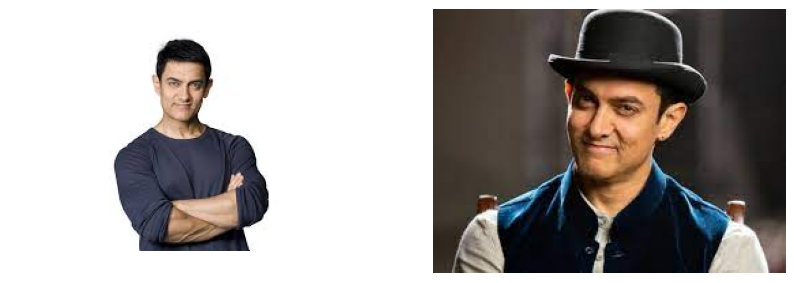

9.733777348812065


In [15]:
import cv2
plt.figure(figsize=(10, 5)) 
img = cv2.imread(img_name)
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,::-1])
plt.axis("off")

target_img = cv2.imread(target_img_name)
plt.subplot(1, 2, 2)
plt.imshow(target_img[:,:,::-1])
plt.axis("off")
plt.show()
print(df.iloc[0].distance)

# Deep Face Detects faces in picture

In [120]:
img = DeepFace.detectFace(img_path=img_name , detector_backend="mtcnn")

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
1/1 [==============================] - 0s 13ms/step


In [121]:
target_img =  DeepFace.detectFace(img_path=target_img_name , detector_backend="mtcnn")

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
1/1 [==============================] - 0s 12ms/step


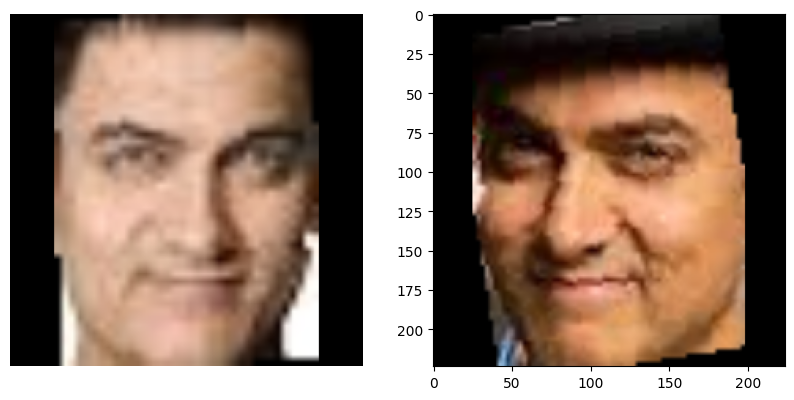

9.733777348812065


In [122]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(img)
plt.axis("off")

ax2 = fig.add_subplot(1,2,2)
plt.imshow(target_img)

plt.show()
print(df.iloc[0].distance)